C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


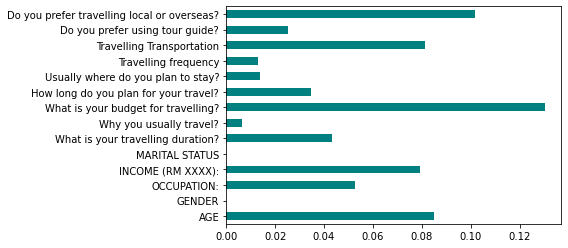

In [69]:
# Best using Features Selection: mutual_info_classif
 

# Read data from external file 
import pandas as pd 
dfCSV = pd.read_csv("train-IT.csv") 
 
dfCSV.head

# Data slicing 
x = dfCSV.iloc[:, 0:14] 
y = dfCSV.iloc[:, 14:15] 
x.head() 

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importances = mutual_info_classif(x, y)
feat_importances = pd.Series(importances, dfCSV.columns[0:len(dfCSV.columns)-2])
feat_importances.plot(kind='barh', color='teal')
plt.show()

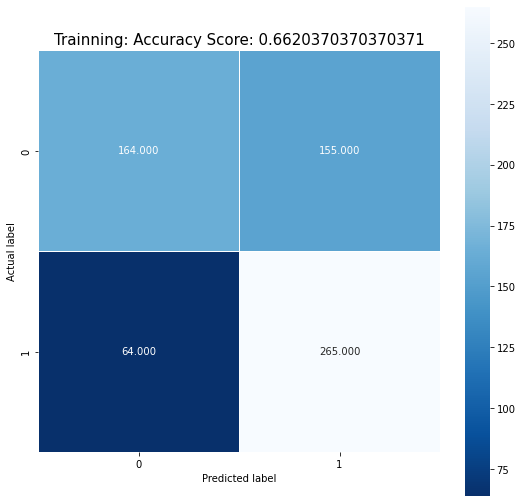

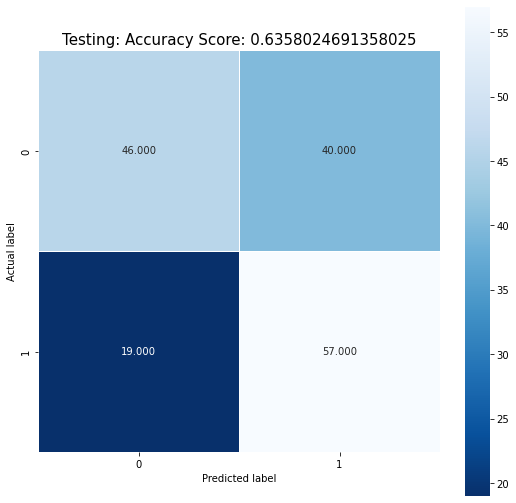

In [86]:
# Read data from external file 
import pandas as pd 
dfCSV = pd.read_csv("train-IT.csv")

# Data slicing 
x = dfCSV.iloc[:, [11,10, 9,6,5,4,3,1,0]]
y = dfCSV.iloc[:, [15]] 
x.head() 

# Convert dataframe to array
import numpy as np
x = x.values 
y = y.values 
y = y.ravel() 
 
 
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier


# Create a k-NN classifier with custom weights
modelKnn = KNeighborsClassifier(p=1, n_neighbors=47, algorithm='brute') 
modelKnn.fit(x, y)

yPred = modelKnn.predict(x)
 
# Testing & performance analysis -Trainning data 
import sklearn.metrics as skm 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,9)) 
sns.heatmap(skm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); 
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Trainning: Accuracy Score: {0}'.format(skm.accuracy_score(y, yPred)) 
plt.title(all_sample_title, size = 15); 

# Read data from external file 
import pandas as pd 
dfCSV2 = pd.read_csv("test-IT.csv") 
 
# Data slicing 
x2 = dfCSV2.iloc[:, [11,10,9,6,5,4,3,1,0]] 
y2 = dfCSV2.iloc[:, [15]] 
x2.head() 
 
# Convert dataframe to array 
x2 = x2.values 
y2 = y2.values 
y2 = y2.ravel() 


yPred2 = modelKnn.predict(x2) 
 
# Testing & performance analysis -Testing data 
import sklearn.metrics as skm 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,9)) 
sns.heatmap(skm.confusion_matrix(y2, yPred2), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); 
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Testing: Accuracy Score: {0}'.format(skm.accuracy_score(y2, yPred2)) 
plt.title(all_sample_title, size = 15);

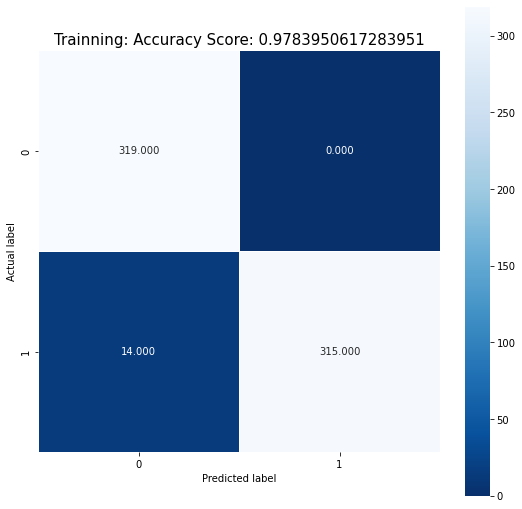

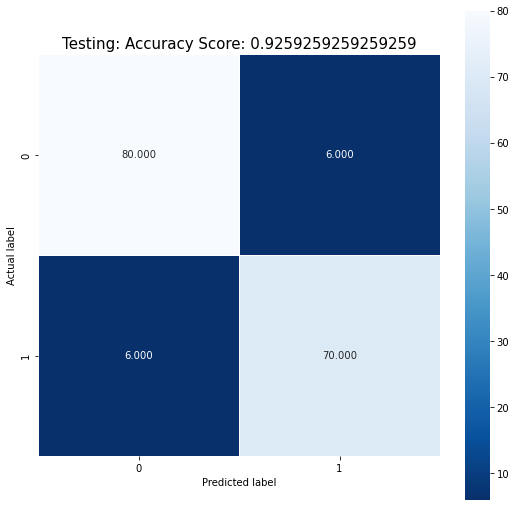

In [94]:
# Read data from external file 
import pandas as pd 
dfCSV = pd.read_csv("train-IT.csv")

# Data slicing 
x = dfCSV.iloc[:, [11,10, 9,6,5,3,2,1]] 
y = dfCSV.iloc[:, [15]] 
x.head() 

# Convert dataframe to array
import numpy as np
x = x.values 
y = y.values 
y = y.ravel() 
 
 
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

# Define custom weight function
def custom_weight(distances): 
    weights = np.exp(-distances) 
    return weights

# Create a k-NN classifier with custom weights
modelKnn = KNeighborsClassifier(p=1, weights=custom_weight, n_neighbors=2) 
modelKnn.fit(x, y)

yPred = modelKnn.predict(x)
 
# Testing & performance analysis -Trainning data 
import sklearn.metrics as skm 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,9)) 
sns.heatmap(skm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); 
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Trainning: Accuracy Score: {0}'.format(skm.accuracy_score(y, yPred)) 
plt.title(all_sample_title, size = 15); 

# Read data from external file 
import pandas as pd 
dfCSV2 = pd.read_csv("test-IT.csv") 
 
# Data slicing 
x2 = dfCSV2.iloc[:, [11,10,9,6,5,3,2,1]] 
y2 = dfCSV2.iloc[:, [15]] 
x2.head() 
 
# Convert dataframe to array 
x2 = x2.values 
y2 = y2.values 
y2 = y2.ravel() 



# Create a bagging ensemble classifier
bagging = BaggingClassifier(base_estimator=modelKnn, n_estimators=10, max_samples=0.8, bootstrap=True, n_jobs=-1)
bagging.fit(x2, y2) 


yPred2 = bagging.predict(x2)  
 
# Testing & performance analysis -Testing data 
import sklearn.metrics as skm 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,9)) 
sns.heatmap(skm.confusion_matrix(y2, yPred2), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); 
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Testing: Accuracy Score: {0}'.format(skm.accuracy_score(y2, yPred2)) 
plt.title(all_sample_title, size = 15);